<a href="https://colab.research.google.com/github/AdrianCobo/Deep-Learning-And-Artificial-Intelligence/blob/main/L6_AutoregressiveModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

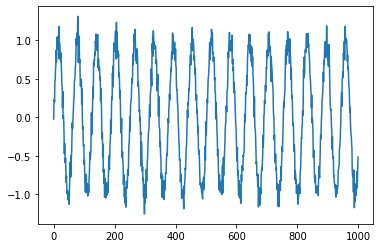

In [2]:
# make the originala data
N = 1000
series = np.sin(0.1*np.arange(N))  + np.random.randn(N)*0.1

# plot it
plt.plot(series)
plt.show()

In [3]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y).reshape(-1,1)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10) Y.shape (990, 1)


In [4]:
### try autoregressive linear model
model = nn.Linear(T,1)

In [5]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [6]:
# make inputs and targets
# we dont want to split out data randomly in this case because we want to predict
# the future
X_train = torch.from_numpy(X[:-N//2].astype(np.float32()))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32()))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32()))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32()))

In [7]:
# Training
## full gradiant descent != batch gradient descent
## we use the full dataset because in this case, its small
def full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs=200):
  # Stuff to store
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()

    # Test loss 
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if (it + 1) % 5 == 0:
      print(f'Epoch  {it+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

  return train_losses, test_losses




In [8]:
train_losses, test_losses = full_gd(model,criterion, optimizer,X_train, y_train, X_test, y_test)

Epoch  5/200, Train Loss: 0.1082, Test Loss: 0.1004
Epoch  10/200, Train Loss: 0.0717, Test Loss: 0.0368
Epoch  15/200, Train Loss: 0.0490, Test Loss: 0.0308
Epoch  20/200, Train Loss: 0.0306, Test Loss: 0.0162
Epoch  25/200, Train Loss: 0.0222, Test Loss: 0.0164
Epoch  30/200, Train Loss: 0.0178, Test Loss: 0.0151
Epoch  35/200, Train Loss: 0.0176, Test Loss: 0.0167
Epoch  40/200, Train Loss: 0.0164, Test Loss: 0.0152
Epoch  45/200, Train Loss: 0.0172, Test Loss: 0.0146
Epoch  50/200, Train Loss: 0.0162, Test Loss: 0.0135
Epoch  55/200, Train Loss: 0.0152, Test Loss: 0.0132
Epoch  60/200, Train Loss: 0.0152, Test Loss: 0.0135
Epoch  65/200, Train Loss: 0.0151, Test Loss: 0.0132
Epoch  70/200, Train Loss: 0.0148, Test Loss: 0.0131
Epoch  75/200, Train Loss: 0.0147, Test Loss: 0.0131
Epoch  80/200, Train Loss: 0.0146, Test Loss: 0.0131
Epoch  85/200, Train Loss: 0.0145, Test Loss: 0.0131
Epoch  90/200, Train Loss: 0.0145, Test Loss: 0.0131
Epoch  95/200, Train Loss: 0.0144, Test Loss: 0

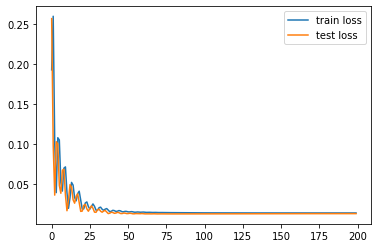

In [9]:
# Plot the train loss and testloss per iteraiton
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [10]:
# "Wrong forecast using true targets"

validation_target = Y[-N//2:]
validation_predictions = []

# index of firts validation input
i = 0

while len(validation_predictions) < len(validation_target):
  input_ = X_test[i].view(1,-1)
  p = model(input_)[0,0].item() # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

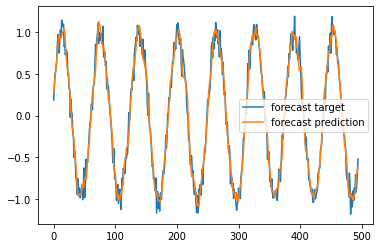

In [11]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [12]:
# "correct forecast using true targets"

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
# 1-D array of length T
last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
  input_ = last_x.view(1,-1)
  p = model(input_)
  #[0,0].item() # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p[0,0].item())

  # make the new input
  last_x = torch.cat((last_x[1:], p[0]))

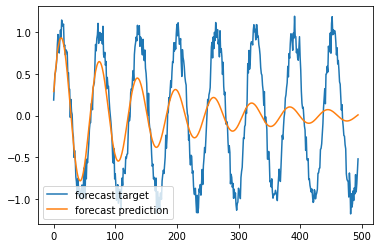

In [13]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()